In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch
from utils import *
import numpy as np
#torch.manual_seed(0)
import warnings
warnings.filterwarnings('ignore')

In [13]:
transform = transforms.Compose([
    #transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [14]:
import torch.nn as nn
import torch.nn as nn
try:
    model = torch.load("Pyramid_3_exits.pth")
except:
    print("No trained model found")

In [15]:
correct_1 = 0
correct_2 = 0
correct_3 = 0
total = 0
test_images = torch.tensor([])
exit_1_predictions = torch.tensor([])
exit_2_predictions = torch.tensor([])
exit_3_predictions = torch.tensor([])
total_pred_1 = torch.tensor([])
total_pred_2 = torch.tensor([])
total_pred_3 = torch.tensor([])
total_labels_test = torch.tensor([])
model.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        test_images = torch.cat((test_images,images),dim=0)
        images = images.cuda()
        labels = labels.cuda()
        exit_1,exit_2,exit_3 = model(images)
        exit_1_predictions = torch.cat((exit_1_predictions,exit_1.cpu()),dim=0)
        exit_2_predictions = torch.cat((exit_2_predictions,exit_2.cpu()),dim=0)
        exit_3_predictions = torch.cat((exit_3_predictions,exit_3.cpu()),dim=0)
        _, predicted_1 = torch.max(exit_1.data, 1)
        _, predicted_2 = torch.max(exit_2.data, 1)
        _,predicted_3 = torch.max(exit_3.data,1)
        total_pred_1 = torch.cat((total_pred_1.cpu().float(),exit_1.cpu()),dim=0)
        total_pred_2 = torch.cat((total_pred_2.cpu().float(),exit_2.cpu()),dim=0)
        total_pred_3 = torch.cat((total_pred_3.cpu().float(),exit_3.cpu()),dim=0)
        total_labels_test = torch.cat((total_labels_test.float(),labels.cpu().float()),dim=0)

        total += labels.size(0)
        correct_1 += (predicted_1 == labels).sum().item()
        correct_2 += (predicted_2 == labels).sum().item()
        correct_3 += (predicted_3 == labels).sum().item()
       # print(correct)

print('Accuracy of exit 1 on the 10000 test images:',correct_1 / total)
print('Accuracy of exit 2 on the 10000 test images:',
    correct_2 / total)
print('Accuracy of exit 3 on the 10000 test images:',
    correct_3 / total)

Accuracy of exit 1 on the 10000 test images: 0.5135
Accuracy of exit 2 on the 10000 test images: 0.8281
Accuracy of exit 3 on the 10000 test images: 0.8242


images predicted in the first exit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are  19 images that the network predicted correctly with a confidence of 0.99 that are indeed correct to the labels given in the test set


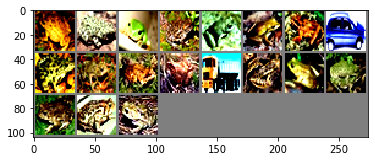

In [16]:
print("images predicted in the first exit")
confidence_images = confidente_images(exit_1_predictions,total_labels_test,test_images,0.99)
confidence_images.shape
display_images(confidence_images)

images predicted in the second exit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are  231 images that the network predicted correctly with a confidence of 0.99999 that are indeed correct to the labels given in the test set
to many images to print!,WI will only print the TOP 50


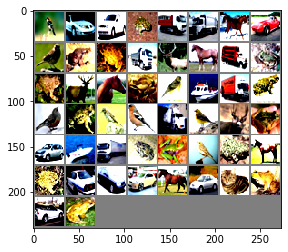

In [17]:
print("images predicted in the second exit")
confidence_images = confidente_images(exit_2_predictions,total_labels_test,test_images,0.99999)
confidence_images.shape
display_images(confidence_images)

images predicted in the third exit


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are  52 images that the network predicted correctly with a confidence of 0.99999 that are indeed correct to the labels given in the test set
to many images to print!,WI will only print the TOP 50


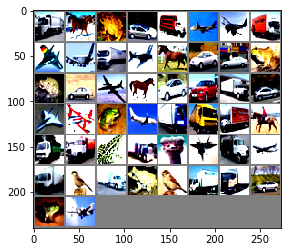

In [18]:
print("images predicted in the third exit")
confidence_images = confidente_images(exit_3_predictions,total_labels_test,test_images,0.99999)
confidence_images.shape
display_images(confidence_images)

In [19]:
_, predicted = torch.max(ensemble(total_pred_1,total_pred_2,total_pred_3,"avg",weights = None), 1)
acc = (predicted == total_labels_test).sum().item()/total
print("accuracy ensembled with normal averaging,",acc)
_, predicted = torch.max(ensemble(total_pred_1,total_pred_2,total_pred_3,"weighted",weights =[0.2,0.3,0.5]), 1)
acc = (predicted == total_labels_test).sum().item()/total
print("accuracy ensembled with weights,",acc)

accuracy ensembled with normal averaging, 0.8237
accuracy ensembled with weights, 0.8256
